In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json, tweepy, requests, re, string
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory as SF
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup as bs
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from wordcloud import WordCloud, wordcloud
import networkx as nx

In [14]:
def web_scraping(alamat_url):
    user_agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36 Edg/111.0.1661.44'
    headers = {'User-Agent': user_agent, 'Accept':'image/avif,image/webp,image/apng,image/svg+xml,image/*,*/*;q=0.8'}

    alamat = alamat_url
    req = Request(alamat, headers=headers)
    html = urlopen(req)

    data = bs(html, 'html.parser')
    berita = data.find_all("div", {"class":"detail__body-text itp_bodycontent"})
    judul = data.find_all("h1", {"class":"detail__title"})
    judul_berita = [judul.get_text() for judul in judul]
    teks_berita = [berita.get_text() for berita in berita]
    df_berita = pd.DataFrame(judul_berita, columns=['judul'])
    df_berita['teks'] = teks_berita
    
    return df_berita

In [20]:
hal_1 = web_scraping('https://sport.detik.com/sepakbola/liga-spanyol/d-6636530/oezil-el-clasico-sekarang-tak-seseru-dulu')
hal_2 = web_scraping('https://sport.detik.com/sepakbola/liga-inggris/d-6636527/gullit-ten-hag-diuntungkan-dengan-kontroversi-ronaldo-di-mu')
hal_3 = web_scraping('https://sport.detik.com/sepakbola/bola-dunia/d-6636509/gol-terjauh-di-laga-bola-dari-goal-kick-kiper-jebol-gawang-lawan')
hal_4 = web_scraping('https://sport.detik.com/sepakbola/gila-bola/d-6636311/saat-messi-pilih-dikepung-ratusan-orang-ketimbang-kabur')
hal_5 = web_scraping('https://sport.detik.com/sepakbola/liga-inggris/d-6635800/lindelof-minim-bermain-ingin-tinggalkan-mu')
hal_6 = web_scraping('https://sport.detik.com/sepakbola/liga-indonesia/d-6635744/gandeng-weird-genius-fifa-umumkan-lagu-resmi-piala-dunia-u-20')
hal_7 = web_scraping('https://sport.detik.com/sepakbola/bola-dunia/d-6635192/lionel-messi-sudah-tembus-800-gol')
hal_8 = web_scraping('https://sport.detik.com/sepakbola/liga-inggris/d-6634821/de-zerbi-dianggap-cocok-gantikan-klopp-di-liverpool?_ga=2.204684048.1411062473.1679575878-1860909170.1679368667')
hal_9 = web_scraping('https://sport.detik.com/sepakbola/liga-inggris/d-6634819/pengusaha-finlandia-ajukan-tawaran-buat-mu-ajak-fans-partisipasi?_ga=2.204684048.1411062473.1679575878-1860909170.1679368667')
hal_10 = web_scraping('https://sport.detik.com/sepakbola/bola-dunia/d-6634276/jika-inggris-juara-euro-2024-southgate-mungkin-bertahan?_ga=2.231347871.1411062473.1679575878-1860909170.1679368667')
hal_11 = web_scraping('https://sport.detik.com/sepakbola/liga-spanyol/d-6616149/xavi-sedih-barcelona-diledek-dengan-sebutan-mafia?_ga=2.192533290.1411062473.1679575878-1860909170.1679368667')
hal_12 = web_scraping('https://sport.detik.com/sepakbola/liga-inggris/d-6633951/saran-buat-chelsea-lepas-mount-dan-pulisic-permanenkan-joao-felix?_ga=2.261248909.1411062473.1679575878-1860909170.1679368667')
hal_13 = web_scraping('https://sport.detik.com/sepakbola/bola-dunia/d-6633516/griezmann-marah-karena-tak-jadi-kapten-prancis-deschamps-bilang-gini?_ga=2.261248909.1411062473.1679575878-1860909170.1679368667')
hal_14 = web_scraping('https://sport.detik.com/sepakbola/bola-dunia/d-6633474/ronaldo-sempat-pertimbangkan-pensiun-dari-portugal-usai-piala-dunia-2022?_ga=2.261248909.1411062473.1679575878-1860909170.1679368667')
hal_15 = web_scraping('https://sport.detik.com/sepakbola/liga-inggris/d-6633466/ronaldo-akhirnya-buka-suara-soal-kepergiannya-dari-mu?_ga=2.30659263.1411062473.1679575878-1860909170.1679368667')
hal_16 = web_scraping('https://sport.detik.com/sepakbola/bola-dunia/d-6633410/wasit-mesir-ini-diskors-gegara-anulir-gol-modal-hp-penonton?_ga=2.30659263.1411062473.1679575878-1860909170.1679368667')
hal_17 = web_scraping('https://sport.detik.com/sepakbola/bola-dunia/d-6633409/kritik-pedas-lahm-pada-psg-seperti-toko-mewah-tapi-hambar?_ga=2.30659263.1411062473.1679575878-1860909170.1679368667')
hal_18 = web_scraping('https://sport.detik.com/sepakbola/bola-dunia/d-6633406/ruediger-bakal-ceritakan-kehebatan-oezil-ke-anak-cucu?_ga=2.30659263.1411062473.1679575878-1860909170.1679368667')
hal_19 = web_scraping('https://sport.detik.com/sepakbola/bola-dunia/d-6633171/mesut-oezil-umumkan-pensiun-dari-sepakbola?_ga=2.239801091.1411062473.1679575878-1860909170.1679368667')
hal_20 = web_scraping('https://sport.detik.com/sepakbola/gila-bola/d-6632922/pria-ini-marah-naik-motor-masuk-lapangan-ganggu-pertandingan-bola?_ga=2.239801091.1411062473.1679575878-1860909170.1679368667')
hal_21 = web_scraping('https://sport.detik.com/sepakbola/bola-dunia/d-6632790/cara-grealish-healing-usai-gagal-di-piala-dunia-tur-home-alone?_ga=2.239801091.1411062473.1679575878-1860909170.1679368667')
hal_22 = web_scraping('https://sport.detik.com/sepakbola/liga-italia/d-6632787/rabiot-inter-tidak-sekuat-musim-lalu?_ga=2.3291056.1411062473.1679575878-1860909170.1679368667')
hal_23 = web_scraping('https://sport.detik.com/sepakbola/gila-bola/d-6632574/senyum-messi-dikepung-ratusan-orang?_ga=2.3291056.1411062473.1679575878-1860909170.1679368667')
hal_24 = web_scraping('https://sport.detik.com/sepakbola/bola-dunia/d-6631954/ederson-klaim-ancelotti-bakal-latih-timnas-brasil')
hal_25 = web_scraping('https://sport.detik.com/sepakbola/liga-spanyol/d-6631948/suporter-rasis-ke-vinicius-dihukum-larangan-ke-stadion-3-tahun')
hal_26 = web_scraping('https://sport.detik.com/sepakbola/liga-italia/d-6631938/ibrahimovic-takut-pensiun')
hal_27 = web_scraping('https://sport.detik.com/sepakbola/liga-inggris/d-6631923/dear-conte-pemain-tottenham-tak-senang-disebut-egois')
hal_28 = web_scraping('https://sport.detik.com/sepakbola/bola-dunia/d-6631901/mbappe-resmi-jadi-kapten-timnas-prancis-griezmann-wakilnya')
hal_29 = web_scraping('https://sport.detik.com/sepakbola/liga-indonesia/d-6631825/wasit-fariq-hitaba-bicara-polemik-timnas-israel-di-piala-dunia-u-20?_ga=2.230748831.1411062473.1679575878-1860909170.1679368667')
hal_30 = web_scraping('https://sport.detik.com/sepakbola/bola-dunia/d-6631187/haaland-dipulangkan-dari-skuad-norwegia-karena-cedera?_ga=2.269146993.1411062473.1679575878-1860909170.1679368667')
hal_31 = web_scraping('https://sport.detik.com/sepakbola/liga-indonesia/d-6631100/sosok-plt-di-asprov-dki-diharapkan-bisa-benahi-roda-organisasi?_ga=2.269146993.1411062473.1679575878-1860909170.1679368667')
hal_32 = web_scraping('https://sport.detik.com/sepakbola/liga-inggris/d-6630768/mitrovic-dorong-wasit-kena-kartu-merah-bruno-fernandes-kok-nggak?_ga=2.269146993.1411062473.1679575878-1860909170.1679368667')
hal_33 = web_scraping('https://sport.detik.com/sepakbola/liga-inggris/d-6630465/dorong-wasit-mitrovic-terancam-tak-bisa-main-lebih-dari-10-laga?_ga=2.269146993.1411062473.1679575878-1860909170.1679368667')
hal_34 = web_scraping('https://sport.detik.com/sepakbola/bola-dunia/d-6630216/jadwal-jeda-internasional-italia-vs-inggris-jadi-teman-sahur?_ga=2.269146993.1411062473.1679575878-1860909170.1679368667')
hal_35 = web_scraping('https://sport.detik.com/sepakbola/bola-dunia/d-6629805/deschamps-kecewa-ditinggal-pensiun-varane?_ga=2.269146993.1411062473.1679575878-1860909170.1679368667')
hal_36 = web_scraping('https://sport.detik.com/sepakbola/gila-bola/d-6629491/kutukan-kim-kardashian-kemarin-arsenal-kini-psg-yang-jadi-korban?_ga=2.190050987.1411062473.1679575878-1860909170.1679368667')
hal_37 = web_scraping('https://sport.detik.com/sepakbola/liga-indonesia/d-6629202/proses-naturalisasi-tiga-pemain-keturunan-untuk-timnas-u-20-sudah-oke?_ga=2.190050987.1411062473.1679575878-1860909170.1679368667')
hal_38 = web_scraping('https://sport.detik.com/sepakbola/liga-italia/d-6627982/allegri-juventus-gentlemen-tidak-bicara-soal-wasit?_ga=2.190050987.1411062473.1679575878-1860909170.1679368667')
hal_39 = web_scraping('https://sport.detik.com/sepakbola/gila-bola/d-6627659/alumni-elektro-juara-di-ia-itb-cup-2023?_ga=2.190050987.1411062473.1679575878-1860909170.1679368667')
hal_40 = web_scraping('https://sport.detik.com/sepakbola/liga-indonesia/d-6627310/pssi-kebut-penyelesaian-naturalisasi-pemain-dua-pekan-selesai?_ga=2.190050987.1411062473.1679575878-1860909170.1679368667')
hal_41 = web_scraping('https://sport.detik.com/sepakbola/liga-indonesia/d-6627248/pssi-bikin-turnamen-liga-2-dan-liga-3-pada-juni-2023?_ga=2.190050987.1411062473.1679575878-1860909170.1679368667')
hal_42 = web_scraping('https://sport.detik.com/sepakbola/liga-indonesia/d-6627187/indonesia-jalin-kerja-sama-dengan-jepang-soal-liga?_ga=2.190050987.1411062473.1679575878-1860909170.1679368667')
hal_43 = web_scraping('https://sport.detik.com/sepakbola/liga-spanyol/d-6627115/jelang-el-clasico-xavi-barca-takkan-goyah-oleh-isu-wasit?_ga=2.190050987.1411062473.1679575878-1860909170.1679368667')
hal_44 = web_scraping('https://sport.detik.com/sepakbola/liga-indonesia/d-6626966/rencana-indonesia-hadapi-argentina-diledek-fans-malaysia?_ga=2.260765453.1411062473.1679575878-1860909170.1679368667')
hal_45 = web_scraping('https://sport.detik.com/sepakbola/liga-spanyol/d-6626710/jelang-el-clasico-barcelona-enggan-bahas-skandal-suap-wasit?_ga=2.260765453.1411062473.1679575878-1860909170.1679368667')
hal_46 = web_scraping('https://sport.detik.com/sepakbola/liga-spanyol/d-6626413/araujo-tak-sabar-ingin-mainkan-el-clasico-pertamanya-di-camp-nou')
hal_47 = web_scraping('https://sport.detik.com/sepakbola/gila-bola/d-6626393/muda-kerja-keras-tua-foya-foya-ala-adebayor')
hal_48 = web_scraping('https://sport.detik.com/sepakbola/liga-spanyol/d-6626247/5-fakta-vinicius-jelang-el-clasico-diam-diam-suka-barcelona')
hal_49 = web_scraping('https://sport.detik.com/sepakbola/liga-indonesia/d-6625942/12-pemainnya-ke-timnas-persija-minta-laga-kontra-persita-ditunda')
hal_50 = web_scraping('https://sport.detik.com/sepakbola/bola-dunia/d-6625611/tangis-eks-liverpool-lucas-leiva-harus-pensiun-karena-masalah-jantung')
hal_51 = web_scraping('https://sport.detik.com/sepakbola/bola-dunia/d-6625611/tangis-eks-liverpool-lucas-leiva-harus-pensiun-karena-masalah-jantung')
hal_52 = web_scraping('https://sport.detik.com/sepakbola/uefa/d-6625443/benfica-vs-inter-milan-kenangan-indah-nerazzurri-tahun-1965')
hal_53 = web_scraping('https://sport.detik.com/sepakbola/liga-spanyol/d-6625435/courtois-ungkap-kekecewaan-eden-hazard-di-madrid')
hal_54 = web_scraping('https://sport.detik.com/sepakbola/uefa/d-6625434/haaland-mungkin-kepingan-yang-selama-ini-dicari-man-city')
hal_55 = web_scraping('https://sport.detik.com/sepakbola/uefa/d-6625354/alisson-kritik-liverpool-usai-disingkirkan-madrid-kurang-semangat')
hal_56 = web_scraping('https://sport.detik.com/sepakbola/liga-spanyol/d-6625229/jika-terbukti-suap-wasit-barcelona-terancam-degradasi')
hal_57 = web_scraping('https://sport.detik.com/sepakbola/liga-indonesia/d-6625176/soal-nasib-6-venue-piala-dunia-pssi-pasrah-dengan-keputusan-fifa')
hal_58 = web_scraping('https://sport.detik.com/sepakbola/liga-indonesia/d-6625176/soal-nasib-6-venue-piala-dunia-pssi-pasrah-dengan-keputusan-fifa')
hal_59 = web_scraping('https://sport.detik.com/sepakbola/uefa/d-6625097/calon-favorit-juara-liga-champions-city-pertama-milan-terbawah')
hal_60 = web_scraping('https://sport.detik.com/sepakbola/uefa/d-6624937/hasil-drawing-perempatfinal-liga-champions-real-madrid-vs-chelsea')
hal_61 = web_scraping('https://sport.detik.com/sepakbola/liga-inggris/d-6624437/conte-kasih-kode-harry-kane-akan-tinggalkan-spurs')
hal_62 = web_scraping('https://sport.detik.com/sepakbola/liga-indonesia/d-6623721/usai-kongres-fifa-erick-thohir-jajaki-kerja-sama-dengan-federasi-australia')
hal_63 = web_scraping('https://sport.detik.com/sepakbola/uefa/d-6623714/jangan-bersedih-arsenal-masih-ada-premier-league-kok')
hal_64 = web_scraping('https://sport.detik.com/sepakbola/liga-inggris/d-6623560/musim-stefan-bajcetic-selesai')
hal_65 = web_scraping('https://sport.detik.com/sepakbola/gila-bola/d-6623130/cerita-ronaldinho-di-penjara-takut-digebukin-eh-disuruh-main-bola')
hal_66 = web_scraping('https://sport.detik.com/sepakbola/bola-dunia/d-6623443/gianni-infantino-kembali-jadi-presiden-fifa-erick-thohir-beri-selamat?_ga=2.238214656.1411062473.1679575878-1860909170.1679368667')
hal_67 = web_scraping('https://sport.detik.com/sepakbola/uefa/d-6623123/courtois-ingin-madrid-hindari-man-city-atau-chelsea-di-perempatfinal?_ga=2.238214656.1411062473.1679575878-1860909170.1679368667')
hal_68 = web_scraping('https://sport.detik.com/sepakbola/liga-inggris/d-6622368/klopp-laga-lawan-city-chelsea-arsenal-akan-tentukan-musim-liverpool?_ga=2.38464803.1411062473.1679575878-1860909170.1679368667')
hal_69 = web_scraping('https://sport.detik.com/sepakbola/liga-indonesia/d-6622144/ketum-pssi-erick-thohir-agendakan-timnas-indonesia-vs-palestina?_ga=2.38464803.1411062473.1679575878-1860909170.1679368667')
hal_70 = web_scraping('https://sport.detik.com/sepakbola/uefa/d-6621565/betis-vs-mu-pellegrini-belum-mau-lempar-handuk?_ga=2.38464803.1411062473.1679575878-1860909170.1679368667')
hal_71 = web_scraping('https://sport.detik.com/sepakbola/liga-indonesia/d-6621715/simic-menang-gugatan-di-fifa-persija-wajib-bayar-tunggakan-rp-7-miliar?_ga=2.38464803.1411062473.1679575878-1860909170.1679368667')
hal_72 = web_scraping('https://sport.detik.com/sepakbola/uefa/d-6621546/inter-minta-uefa-usut-insiden-fans-terkurung-di-markas-porto?_ga=2.38464803.1411062473.1679575878-1860909170.1679368667')
hal_73 = web_scraping('https://sport.detik.com/sepakbola/liga-spanyol/d-6621478/laliga-ngamuk-ke-fifa?_ga=2.234020510.1411062473.1679575878-1860909170.1679368667')
hal_74 = web_scraping('https://sport.detik.com/sepakbola/liga-indonesia/d-6621475/erick-thohir-presiden-afc-dukung-pembenahan-total-pssi?_ga=2.234020510.1411062473.1679575878-1860909170.1679368667')
hal_75 = web_scraping('https://sport.detik.com/sepakbola/uefa/d-6621450/man-city-mau-juara-liga-champions-langkahi-dulu-tim-ini?_ga=2.234020510.1411062473.1679575878-1860909170.1679368667')
hal_76 = web_scraping('https://sport.detik.com/sepakbola/liga-inggris/d-6620970/eks-tottenham-memohon-ke-city-jangan-biarkan-arsenal-juara?_ga=2.234020510.1411062473.1679575878-1860909170.1679368667')
hal_77 = web_scraping('https://sport.detik.com/sepakbola/gila-bola/d-6620823/viral-pemain-akademi-mu-merdu-lantunkan-ayat-suci-al-quran?_ga=2.234020510.1411062473.1679575878-1860909170.1679368667')
hal_78 = web_scraping('https://sport.detik.com/sepakbola/bola-dunia/d-6619541/maroko-bidik-tuan-rumah-piala-dunia-2030-bareng-spanyol-portugal?_ga=2.234020510.1411062473.1679575878-1860909170.1679368667')
hal_79 = web_scraping('https://sport.detik.com/sepakbola/liga-inggris/d-6619399/mu-pastikan-garnacho-cedera-pergelangan-kaki-absen-beberapa-pekan?_ga=2.234020510.1411062473.1679575878-1860909170.1679368667')
hal_80 = web_scraping('https://sport.detik.com/sepakbola/liga-spanyol/d-6619376/ancelotti-perang-dingin-dengan-hazard-tidak-tuh?_ga=2.234020510.1411062473.1679575878-1860909170.1679368667')
hal_81 = web_scraping('https://sport.detik.com/sepakbola/liga-indonesia/d-6619340/koni-apresiasi-persiapan-gelaran-piala-dunia-u-20-2023?_ga=2.192495402.1411062473.1679575878-1860909170.1679368667')
hal_82 = web_scraping('https://sport.detik.com/sepakbola/liga-indonesia/d-6619318/melihat-90-tahun-perjalanan-persib-bandung?_ga=2.192495402.1411062473.1679575878-1860909170.1679368667')
hal_83 = web_scraping('https://sport.detik.com/sepakbola/uefa/d-6619034/presiden-la-liga-bersyukur-psg-kembali-gagal-juara-liga-champions?_ga=2.192495402.1411062473.1679575878-1860909170.1679368667')
hal_84 = web_scraping('https://sport.detik.com/sepakbola/liga-spanyol/d-6618629/laliga-dukung-sikap-real-madrid-soal-kasus-suap-wasit-barcelona?_ga=2.192495402.1411062473.1679575878-1860909170.1679368667')
hal_85 = web_scraping('https://sport.detik.com/sepakbola/liga-indonesia/d-6618624/piala-dunia-u-20-profil-timnas-israel-u-20-ngeri-ngeri-sedap?_ga=2.192495402.1411062473.1679575878-1860909170.1679368667')
hal_86 = web_scraping('https://sport.detik.com/sepakbola/liga-indonesia/d-6618466/piala-dunia-u-20-2023-di-indonesia-profil-timnas-irak-u-20?_ga=2.192495402.1411062473.1679575878-1860909170.1679368667')
hal_87 = web_scraping('https://sport.detik.com/sepakbola/liga-spanyol/d-6618600/skandal-suap-wasit-barcelona-bikin-malu-laliga?_ga=2.201382417.1411062473.1679575878-1860909170.1679368667')
hal_88 = web_scraping('https://sport.detik.com/sepakbola/liga-indonesia/d-6618013/piala-dunia-u-20-2023-israel-main-di-stadion-kapten-i-wayan-dipta?_ga=2.201382417.1411062473.1679575878-1860909170.1679368667')
hal_89 = web_scraping('https://sport.detik.com/sepakbola/gila-bola/d-6617703/pertama-di-liga-inggris-chelsea-ajak-buka-puasa-bersama-di-stamford-bridge?_ga=2.201382417.1411062473.1679575878-1860909170.1679368667')
hal_90 = web_scraping('https://sport.detik.com/sepakbola/liga-indonesia/d-6617619/israel-akan-berlaga-di-piala-dunia-u-20-di-indonesia-ini-sikap-mui?_ga=2.201382417.1411062473.1679575878-1860909170.1679368667')
hal_91 = web_scraping('https://sport.detik.com/sepakbola/liga-inggris/d-6617317/absennya-casemiro-pukulan-telak-buat-mu?_ga=2.201382417.1411062473.1679575878-1860909170.1679368667')
hal_92 = web_scraping('https://sport.detik.com/sepakbola/liga-inggris/d-6617090/usai-laga-mu-vs-southampton-pemain-ini-kena-serangan-rasis?_ga=2.201382417.1411062473.1679575878-1860909170.1679368667')
hal_93 = web_scraping('https://sport.detik.com/sepakbola/bola-dunia/d-6617088/eden-hazard-mantap-pensiun-dari-timnas-tidak-akan-comeback?_ga=2.201382417.1411062473.1679575878-1860909170.1679368667')
hal_94 = web_scraping('https://sport.detik.com/sepakbola/liga-inggris/d-6617041/de-bruyne-menurun-coba-lihat-assist-nya?_ga=2.205725459.1411062473.1679575878-1860909170.1679368667')
hal_95 = web_scraping('https://sport.detik.com/sepakbola/liga-inggris/d-6617016/casemiro-absen-4-laga-mu-kehilangan-obat-penenang?_ga=2.205725459.1411062473.1679575878-1860909170.1679368667')
hal_96 = web_scraping('https://sport.detik.com/sepakbola/liga-indonesia/d-6616998/beres-konser-blackpink-sugbk-berbenah-jelang-kedatangan-fifa?_ga=2.205725459.1411062473.1679575878-1860909170.1679368667')
hal_97 = web_scraping('https://sport.detik.com/sepakbola/liga-inggris/d-6616925/havertz-tajam-lagi-pacarnya-pun-lewati-masa-sulit?_ga=2.205725459.1411062473.1679575878-1860909170.1679368667')
hal_98 = web_scraping('https://sport.detik.com/sepakbola/liga-indonesia/d-6616799/erick-thohir-larang-sugbk-dipakai-event-lagi-sebelum-piala-dunia-u-20?_ga=2.205725459.1411062473.1679575878-1860909170.1679368667')
hal_99 = web_scraping('https://sport.detik.com/sepakbola/bola-dunia/d-6616746/misteri-messi-minta-gaji-rp-92-triliun-ke-al-hilal?_ga=2.205725459.1411062473.1679575878-1860909170.1679368667')
hal_100 = web_scraping('https://sport.detik.com/sepakbola/bola-dunia/d-6616152/mengapa-argentina-gagal-lolos-ke-piala-dunia-u-20?_ga=2.205725459.1411062473.1679575878-1860909170.1679368667')



In [22]:
hal_1

,judul,teks
0,\n Oezil: El Clasico Sekarang Tak Seser...,"\nIstanbul - Eks bintang Real Madrid, Mesut Oe..."


In [23]:
df_news = pd.concat([hal_1, hal_2, hal_3, hal_4, hal_5, hal_6, hal_7, hal_8, hal_9, hal_10, hal_11, hal_12, hal_13, hal_14, hal_15, hal_16, hal_17, hal_18, hal_19, hal_20, hal_21, hal_22, hal_23, hal_24, hal_25, hal_26, hal_27, hal_28, hal_29, hal_30, hal_31, hal_32, hal_33, hal_34, hal_35, hal_36, hal_37, hal_38, hal_39, hal_40, hal_41, hal_42, hal_43, hal_44, hal_45, hal_46, hal_47, hal_48, hal_49, hal_50, hal_51, hal_52, hal_53, hal_54, hal_55, hal_56, hal_57, hal_58, hal_59, hal_60, hal_61, hal_62, hal_63, hal_64, hal_65, hal_66, hal_67, hal_68, hal_69, hal_70, hal_71, hal_72, hal_73, hal_74, hal_75, hal_76, hal_77, hal_78, hal_79, hal_80, hal_81, hal_82, hal_83, hal_84, hal_85, hal_86, hal_87, hal_88, hal_89, hal_90, hal_91, hal_92, hal_93, hal_94, hal_95, hal_96, hal_97, hal_98, hal_99, hal_100],axis=0,sort=False).reset_index()
df_news.drop(columns=['index'], axis=1, inplace=True)

In [24]:
df_news.to_csv("sepakbola.csv", index=False)
df_news

,judul,teks
0,\n Oezil: El Clasico Sekarang Tak Seser...,"\nIstanbul - Eks bintang Real Madrid, Mesut Oe..."
1,\n Gullit: Ten Hag Diuntungkan dengan K...,\nAmsterdam - Legenda sepakbola Belanda Ruud G...
2,\n Gol Terjauh di Laga Bola? Dari Goal ...,\nJakarta - Seorang kiper menjebol gawang tim ...
3,\n Saat Messi Pilih Dikepung Ratusan Or...,\nBuenos Aires - Ada cerita menarik saat Lione...
4,"\n Lindelof Minim Bermain, Ingin Tingga...",\nStockholm - Bek tengah Manchester United Vic...
...,...,...
95,"\n Beres Konser Blackpink, SUGBK Berben...",\nJakarta - Lapangan Stadion Utama Gelora Bung...
96,"\n Havertz Tajam Lagi, Pacarnya pun Lew...",\nJakarta - Kai Havertz sudah mencetak gol ber...
97,\n Erick Thohir Larang SUGBK Dipakai Ev...,\nJakarta - Ketua Umum PSSI sekaligus Ketua LO...
98,"\n Misteri Messi Minta Gaji Rp 9,2 Tril...",\nJakarta - Rumor Lionel Messi mau gabung ke k...


In [116]:
df_news = pd.read_csv('sepakbola.csv')
df_news.head()

,judul,teks
0,\n Oezil: El Clasico Sekarang Tak Seser...,"\nIstanbul - Eks bintang Real Madrid, Mesut Oe..."
1,\n Gullit: Ten Hag Diuntungkan dengan K...,\nAmsterdam - Legenda sepakbola Belanda Ruud G...
2,\n Gol Terjauh di Laga Bola? Dari Goal ...,\nJakarta - Seorang kiper menjebol gawang tim ...
3,\n Saat Messi Pilih Dikepung Ratusan Or...,\nBuenos Aires - Ada cerita menarik saat Lione...
4,"\n Lindelof Minim Bermain, Ingin Tingga...",\nStockholm - Bek tengah Manchester United Vic...


Preparation

In [88]:
def case_folding(data):
    data = data.lower()
    data = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|(\d+)"," ",data).split())
    data = data.translate(str.maketrans("","",string.punctuation))
    data = re.sub(r"\n","",data)
    data = re.sub(r"\t","",data)
    
    return data


In [89]:
def stopword_cleaner(data):
    sw_indonesia = stopwords.words("indonesian")
    sw_english = stopwords.words("english")
    data  = [word for word in data if word not in sw_indonesia]
    data  = [word for word in data if word not in sw_english]
    data = ' '.join(data)
    return data

In [91]:
def stemmer_engine(data):
    factory = SF()
    stemmer = factory.create_stemmer()
    data = stemmer.stem(data)
    return data


In [93]:
def slang_cleaner(data):
    slang_list = [
        ("',",""),
        ("'",""),
        ("video",""),
        ('\n',''),
        ('video',''),
        ('advertisement',''),
        ("['",''),
        ('scroll',''),
        ('resume',''),
        ('baca',''),
        ('content',''),
        ("']",''),
        ('[',''),
        (']',''),
        
        
    ]
    
    word_token = wordpunct_tokenize(data)
    word_list = []
    
    for word in word_token:
        for slang in slang_list:
            if word.lower() in slang[0].lower():
                word = slang[1]
                break
        word_list.append(word)
    
    data = ' '.join(word_list)
    return data    

In [94]:
import nltk

In [95]:
def proses(data):
    data = case_folding(data)
    data = wordpunct_tokenize(data)
    data = stopword_cleaner(data)
    data = stemmer_engine(data)
    return data

In [96]:
df_news['clean'] = 'NaN'

In [97]:
for index in range(len(df_news)):
    df_news.iloc[index,0] = proses(df_news.iloc[index,0])
    df_news.iloc[index,0] = slang_cleaner(df_news.iloc[index,0])
    df_news.iloc[index,0] = proses(df_news.iloc[index,0])


In [98]:
for index in range(len(df_news)):
    df_news.iloc[index,2] = proses(df_news.iloc[index,1])
    df_news.iloc[index,2] = slang_cleaner(df_news.iloc[index,2])
    df_news.iloc[index,2] = proses(df_news.iloc[index,2])


In [99]:
display(df_news)

,judul,teks,clean
0,oezil el clasico seru,"\nIstanbul - Eks bintang Real Madrid, Mesut Oe...",istanbul eks bintang real madrid mesut oezil e...
1,gullit hag untung kontroversi ronaldo mu,\nAmsterdam - Legenda sepakbola Belanda Ruud G...,amsterdam legenda sepakbola belanda ruud gulli...
2,gol laga bola goal kick kiper jebol gawang lawan,\nJakarta - Seorang kiper menjebol gawang tim ...,jakarta kiper jebol gawang tim lawan tendang g...
3,messi pilih kepung ratus orang ketimbang kabur,\nBuenos Aires - Ada cerita menarik saat Lione...,buenos aires cerita tarik lionel messi kepung ...
4,lindelof minim main tinggal mu,\nStockholm - Bek tengah Manchester United Vic...,stockholm bek manchester united victor lindelo...
...,...,...,...
95,beres konser blackpink sugbk benah jelang fifa,\nJakarta - Lapangan Stadion Utama Gelora Bung...,jakarta lapang stadion utama gelora karno sugb...
96,havertz tajam pacar sulit,\nJakarta - Kai Havertz sudah mencetak gol ber...,jakarta kai havertz cetak gol untun chelsea ka...
97,erick thohir larang sugbk pakai event piala dunia,\nJakarta - Ketua Umum PSSI sekaligus Ketua LO...,jakarta ketua pssi ketua loc piala dunia erick...
98,misteri messi gaji rp triliun al hilal,\nJakarta - Rumor Lionel Messi mau gabung ke k...,jakarta rumor lionel messi gabung klub arab sa...


In [101]:
df_news.to_csv("sepakbola_clean.csv", index=False)

In [102]:
df_news.name = 'news'

In [103]:
def char_freq_distribution(data):
    bin = np.arange(0,260,10)
    data["clean"].str.len().hist(bins=bin)
    if data.name == 'tweet':
        judul = 'Tweet'
    else :
        judul = 'News'
    plt.xlabel('Jumlah Huruf per Kata')
    plt.title(f'Distribusi Frekuensi Huruf Data {judul}')
    plt.show()

In [104]:
def word_len_freq_distribution(data):
    bin_range = np.arange(0, 50)
    data['clean'].str.split().map(lambda x: len(x)).hist(bins=bin_range)
    if data.name == 'tweet':
        judul = 'Tweet'
    else :
        judul = 'News'
    plt.xlabel(f'Jumlah Kata per {judul} ')
    plt.title(f'Distribusi Frekuensi Kata Data {judul}')
    plt.show()
    

In [105]:
def mean_words_freq_distribution(data):
    data['clean'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
    if data.name == 'tweet':
        judul = 'Tweet'
    else :
        judul = 'News'
    plt.xlabel(f'Panjang Kata Rata-Rata per {judul} ')
    plt.title(f'Distribusi Frekuensi Panjang Kata Rata-Rata Data {judul}')
    plt.show()   

In [ ]:
def words_freq_distribution(data):
    data['clean'] = data['clean'].apply(lambda x: wordpunct_tokenize(str(x)))
    tweets = [word for tweet in data["clean"] for word in tweet]
    fqdist = FreqDist(tweets)
    most_common_word = fqdist.most_common(50)
    print(most_common_word)
    if data.name == 'tweet':
        judul = 'Tweet'
    else :
        judul = 'News'
    plt.xlabel(f'Frekuensi Kata {judul} ')
    plt.title(f'Distribusi Frekuensi Kata Data {judul}')
    fqdist.plot(100,cumulative=False)
    return most_common_word, tweets

In [107]:
def bigram_analysis (data):
    tweets = [word for tweet in data['clean'] for word in tweet]
    result = pd.Series(nltk.ngrams(tweets, 2)).value_counts()[:20]
    print(result)

##### - Distribusi Frekuensi Jumlah Huruf
##### Pada grafik distribusi frekuensi jumlah huruf pada masing-masing dataframe dapat dilihat bahwa jumlah huruf per kata pada tweet terbanyak yaitu 110 huruf, dan pada data News/judul berita terbanyak sekitar 60 - 70 huruf per kata. 

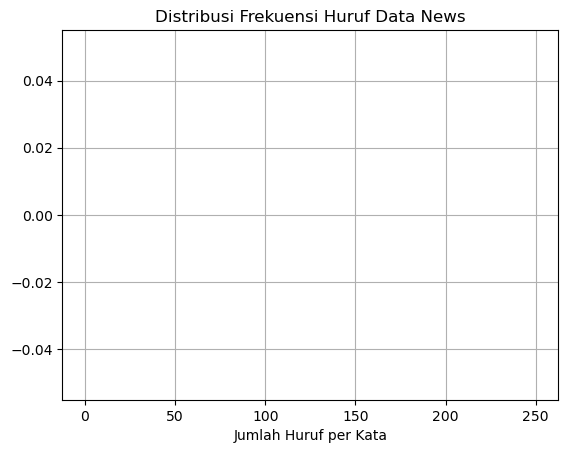

In [108]:
char_freq_distribution(df_news)

##### - Distribusi Frekuensi Jumlah Kata
##### Pada grafik distribusi frekuensi jumlah kata pada masing-masing dataframe dapat dilihat bahwa jumlah kata pada tweet terbanyak di sekitar 15 - 18 kata, dan pada data News/judul berita terbanyak di sekitar 10 - 11 kata. 

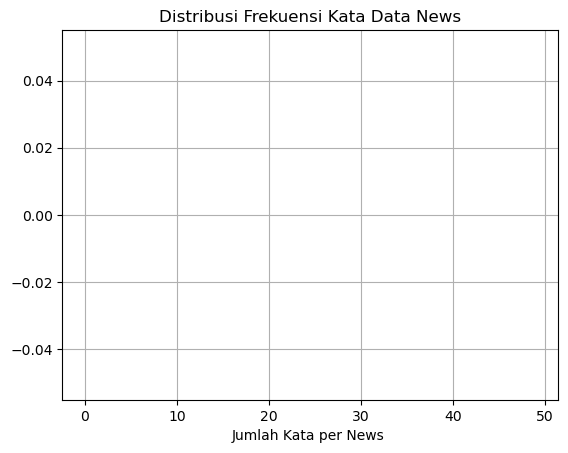

In [109]:
word_len_freq_distribution(df_news)

##### - Distribusi Frekuensi Panjang Rata-Rata Kata
##### Pada grafik distribusi frekuensi panjang rata-rata kata pada masing-masing dataframe dapat dilihat bahwa rata-rata kata pada tweet antara 5 - 6 kata pertweet, dan pada data News/judul berita antara 5 - 5.5 kata per judul. 

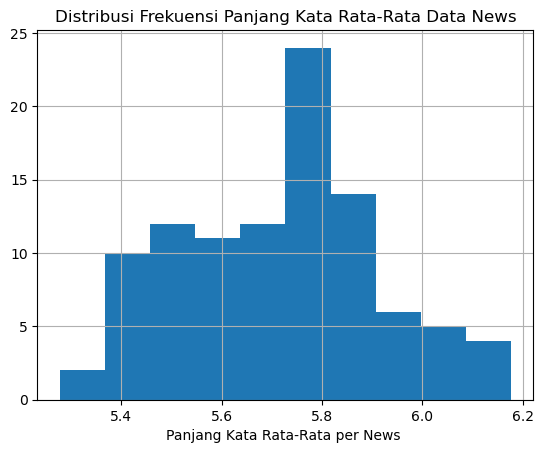

In [110]:
mean_words_freq_distribution(df_news)

##### - Distribusi Frekuensi Kata yang Sering Keluar
##### Pada grafik distribusi frekuensi 50 kata yang paling sering keluar pada masing-masing dataframe dapat dilihat bahwa kata yang paling sering keluar pada data tweet adalah sumur, resap, anies, gagal, total, baswedan, jakarta, jalan, dst dan pada data News/judul adalah sumur, resap, lurah, lebak, bulus,bohong, jakarta, mobil, dst. 

In [115]:
words_freq_distribution(df_news)

KeyError: 'clean'

##### - Distribusi N-gram.
##### Pada output analisis bigram di bawah, dapat dilihat bahwa pada data tweet kata berpasangan yang paling sering keluar adalah sumur-resap, gagal-total, anies-gagal, anies-baswedan, gubernur-jakarta, total-sumur, anggar-sumur, dst. Lalu, pada data news kata berpasangan yang paling sering keluar adalah sumur-resap, bulus-bohong, lebak-bulus, lurah-lebak, dst.
##### Pada output ini dapat dilihat gambaran awalnya data bahwa pada data tweet lebih membahas pada kegagalan anies dalam menjalankan program sumur resapan, dan pada data news lebih membahas pada lurah lebak bulus yang berbohong, dan sebagainya.

In [112]:
bigram_analysis(df_news)

(piala, dunia)           196
(real, madrid)            88
(liga, champions)         64
(erick, thohir)           56
(gambas, detik)           54
(manchester, united)      47
(tuan, rumah)             38
(liga, inggris)           33
(manchester, city)        32
(el, clasico)             30
(lionel, messi)           29
(arab, saudi)             27
(perempatfinal, liga)     26
(man, city)               25
(cristiano, ronaldo)      23
(timnas, indonesia)       23
(premier, league)         22
(dunia, indonesia)        21
(kartu, merah)            21
(inter, mil)              20
dtype: int64
